## Imports

In [10]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = "Phoebe"

## Profiling with cProfile

### cProfile

In [45]:
# ! python -m cProfile -s cumulative sph.py

In [46]:
# ! python -m cProfile -o profile.stats sph.py  

# cProfile notes

We need to break down this one into each function since the profiling of the whole thing is too much to analyze

### snakeviz

In [14]:
! python -m snakeviz profile.stats --server

^C


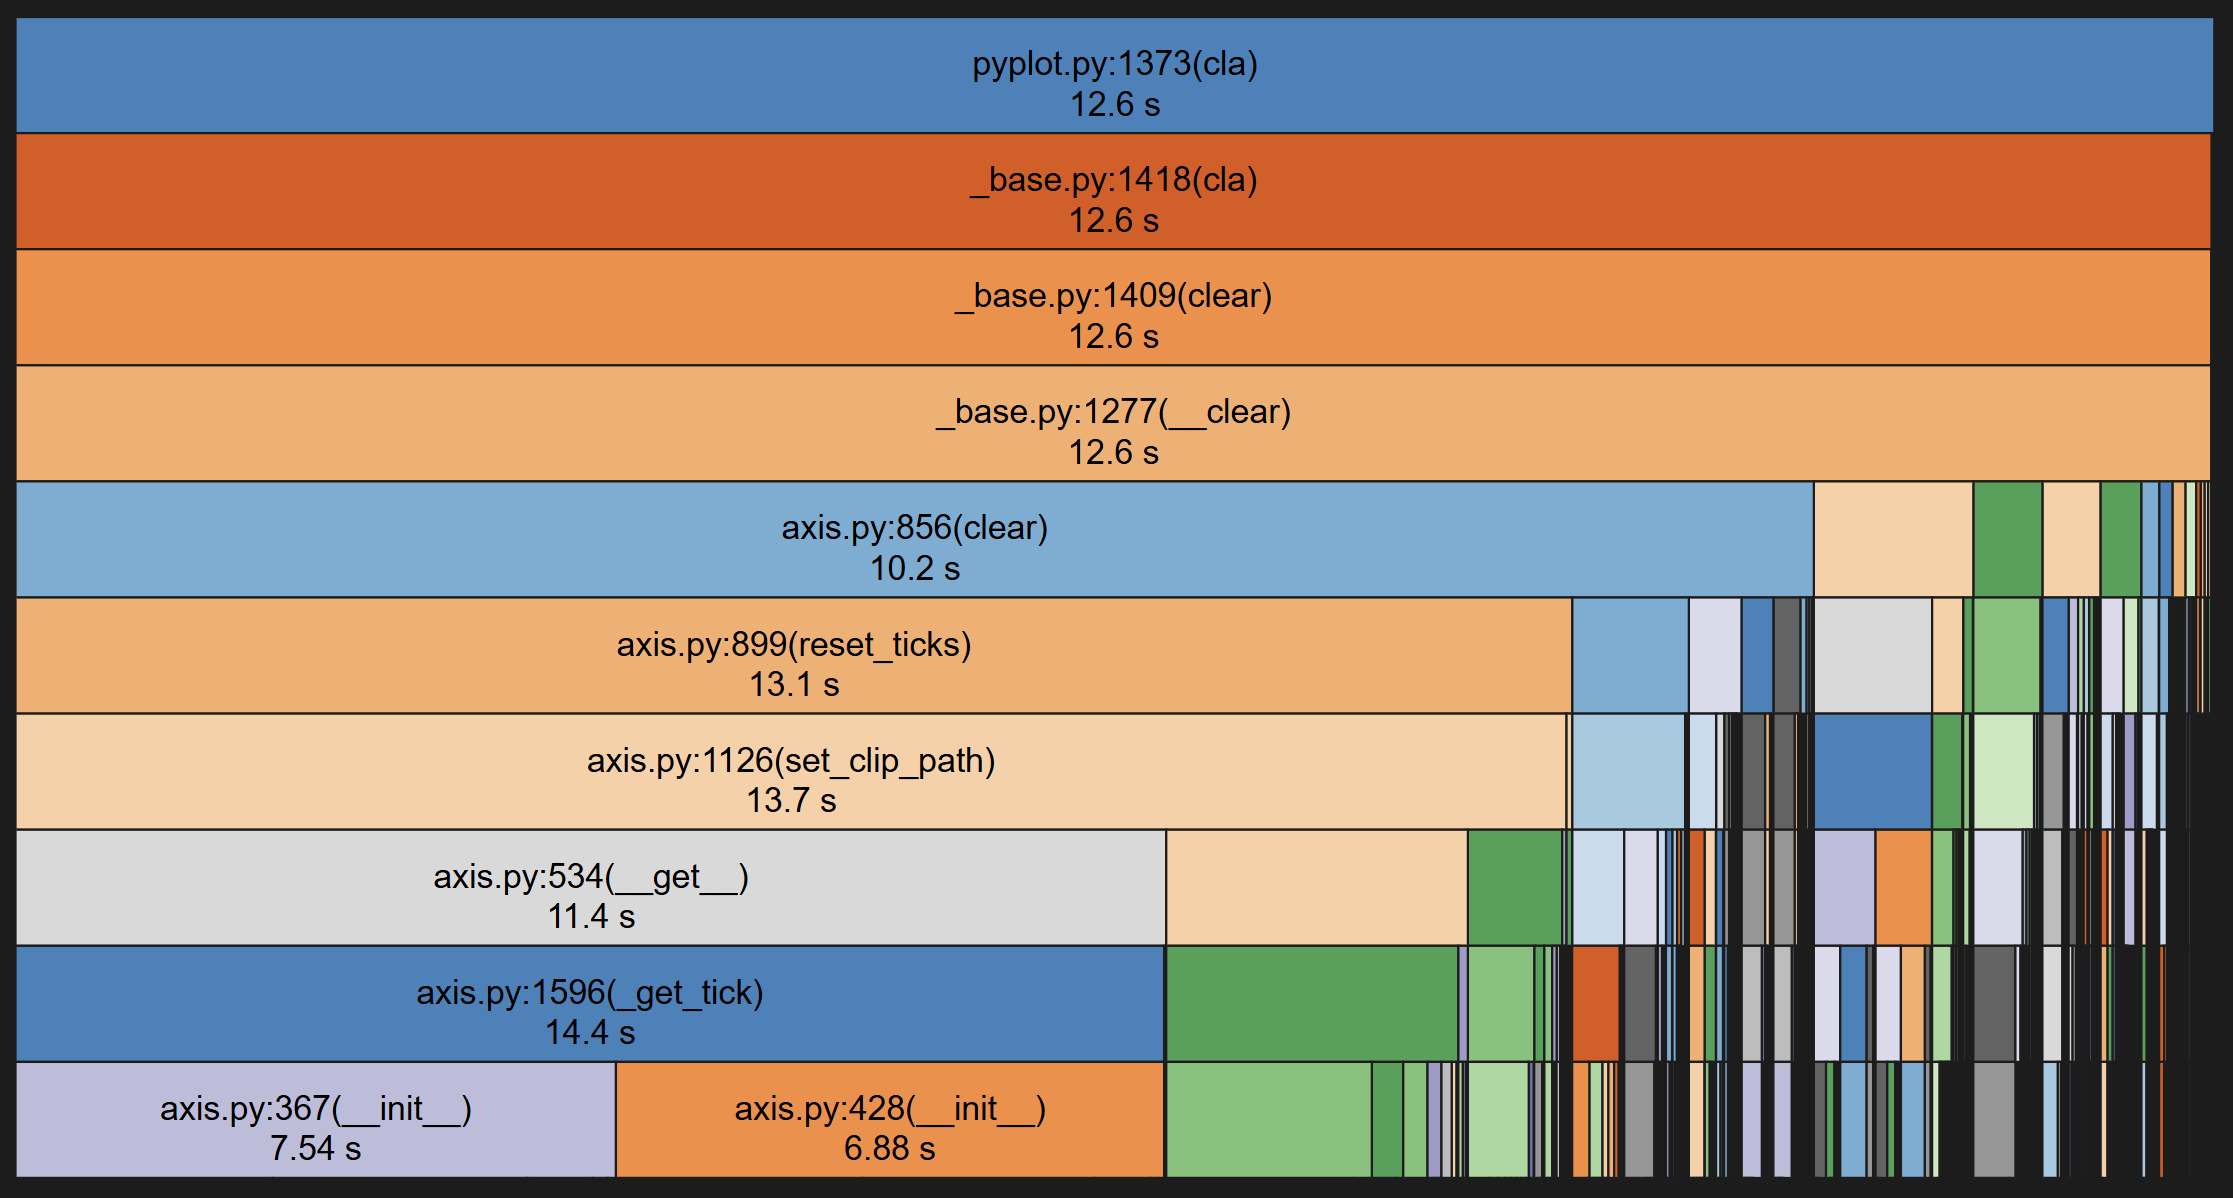

# snakeViz notes 
Not really sure what i'm noticing here, but there are 4/5 py modules that are using the most

## Profiling with memory_profile

In [17]:
! python -m memory_profiler sph.py

In [18]:
! python -m mprof run sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [22]:
! python -m mprof plot mprofile_20250204143302.dat

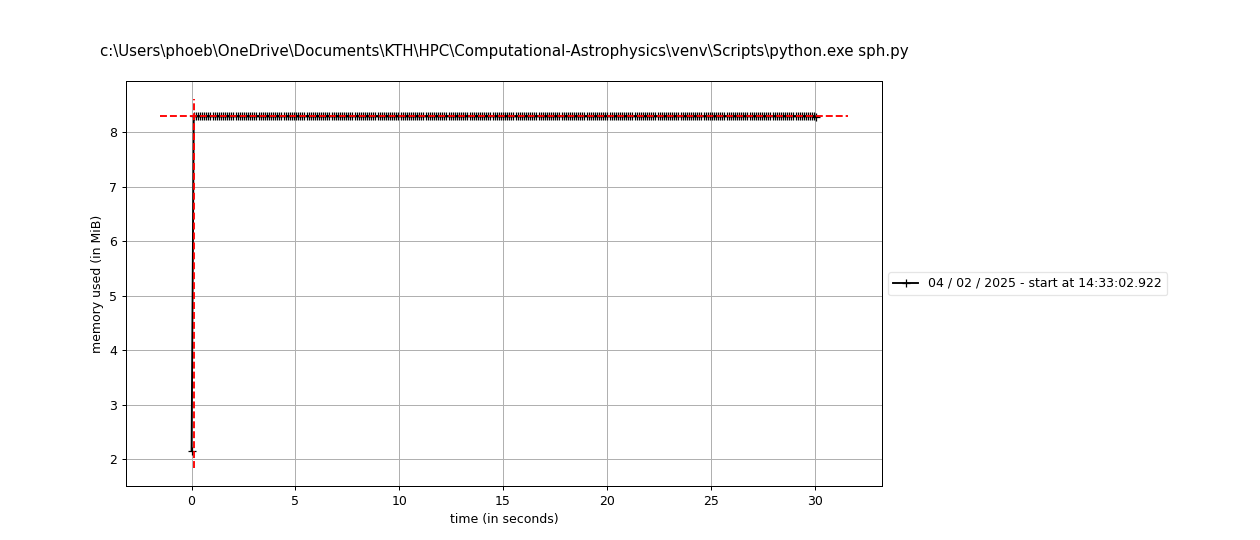

# mprof notes
Not really sure how well this represents the memory usage... but it creates a lot right at the beginning. 

## Profiling with line_profiler

In [42]:
# add @profile to the function you want to profile
! kernprof -l sph.py

Wrote profile results to sph.py.lprof
Inspect results with:
C:\Users\phoeb\OneDrive\Documents\KTH\HPC\Computational-Astrophysics\venv\Scripts\python.exe -m line_profiler -rmt "sph.py.lprof"


In [44]:
! python -m line_profiler -rmt sph.py.lprof 

Timer unit: 1e-06 s

Total time: 79.7923 s
File: sph.py
Function: main at line 154

Line #      Hits         Time  Per Hit   % Time  Line Contents
   154                                           @profile
   155                                           def main():
   156                                           	""" SPH simulation """
   157                                           	
   158                                           	# Simulation parameters
   159         1          1.2      1.2      0.0  	N         = 400    # Number of particles
   160         1          0.5      0.5      0.0  	t         = 0      # current time of the simulation
   161         1          0.4      0.4      0.0  	tEnd      = 12     # time at which simulation ends
   162         1          1.0      1.0      0.0  	dt        = 0.04   # timestep
   163         1          0.4      0.4      0.0  	M         = 2      # star mass
   164         1          0.4      0.4      0.0  	R         = 0.75   # star radiu

# line_profiler notes

- plotting updates takes significant time on line 217
- the key bottleneck places are in getAcc and plotting


# Recommendations

Optimize getAcc Function:
- Investigate and optimize the getAcc function to reduce its execution time.

Reduce Plotting Overhead:
- Consider reducing the frequency of plotting updates.
- Use more efficient plotting techniques or libraries if possible.

Vectorization:
- Ensure that all operations within getAcc and other computationally intensive functions are vectorized using NumPy.

Parallelization:
- Explore parallel processing for independent calculations within the loop.
